## Analysing the Orders during three campaign days
- How many total orders?
- Which store/ city got the highest orders?
- What is the average order amount?
- What are the different payment modes?
- Is there a relation between cancelled orders and payment modes?
- Which stores have got higher orders of in-store pick-up?
- Which date and time got peak orders?
- What are the preferred delivery slots?
- Is there any customer placing multiple orders?
- Do customers ordering from their i-phones order for a larger amount?
- How many orders were cancelled, refunded?

In [2]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# uploading the dataset
df1=pd.read_excel('Order Data.xlsx')

In [54]:
df1.head()

,Zone,Store,City,Order No,shipmentID,fulfilledBy,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Picked Time@ED,Delivered Time@ED,Platform
0,NCR,BB-NEW DELHI-RAJENDRA PLACE MTRO STATION,NCR,800982621,800982621_2,BIGBAZAAR,28/02/21 9:21 am,Standard Delivery,03/03/21 05:00 pm-08:00 pm,mayank nayan,8860274472,Delivered,Rs. 4853.75,BBPC,28/02/21 01:47 pm,28/02/21 05:54 pm,PWA Android
1,NORTH,BB-RUDRAPUR-METROPOLIS MALL,RUDRAPUR,800234521,800234521_2,BIGBAZAAR,28/02/21 12:09 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajesh Jham,9927300005,In Transit,Rs. 1242.50,Payu,28/02/21 07:15 pm,NaN,PWA Android
2,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,800182361,800182361_2,BIGBAZAAR,28/02/21 4:53 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,Rs. 1203.00,Payu,NaN,NaN,BigBazaar Android
3,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,800226361,800226361_2,BIGBAZAAR,28/02/21 4:54 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,Rs. 1203.00,Payu,NaN,NaN,BigBazaar Android
4,NCR,BB-GURGAON-OMAXE SOHNA ROAD-ED,NCR,800422691,800422691_2,BIGBAZAAR,28/02/21 6:07 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Praveen Singh,9899103073,Refunded,Rs. 0.00,FuturePay,NaN,NaN,PWA Android


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48662 entries, 0 to 48661
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Zone               48662 non-null  object
 1   Store              48662 non-null  object
 2   City               48662 non-null  object
 3   Order No           48662 non-null  int64 
 4   shipmentID         48662 non-null  object
 5   fulfilledBy        48662 non-null  object
 6   Order Date & Time  48662 non-null  object
 7   Shipment Type      48662 non-null  object
 8   Delivery Slot      48662 non-null  object
 9   Customer Name      48662 non-null  object
 10  Contact Number     48662 non-null  int64 
 11  Shipment Status    48662 non-null  object
 12  Shipment Amount    48662 non-null  object
 13  Payment Mode       48662 non-null  object
 14  Picked Time@ED     25398 non-null  object
 15  Delivered Time@ED  18302 non-null  object
 16  Platform           48662 non-null  objec

## Dealing with null values

In [56]:
df1.isnull().sum()

Zone                     0
Store                    0
City                     0
Order No                 0
shipmentID               0
fulfilledBy              0
Order Date & Time        0
Shipment Type            0
Delivery Slot            0
Customer Name            0
Contact Number           0
Shipment Status          0
Shipment Amount          0
Payment Mode             0
Picked Time@ED       23264
Delivered Time@ED    30360
Platform                 0
dtype: int64

In [57]:
# will drop the two columns containing null values, for now
# will also drop few other columns, which would not be useful for data analysis
df2=df1.drop(['Picked Time@ED', 'Delivered Time@ED', 'Order No', 'shipmentID', 'fulfilledBy'], axis=1)
df2.head()

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform
0,NCR,BB-NEW DELHI-RAJENDRA PLACE MTRO STATION,NCR,28/02/21 9:21 am,Standard Delivery,03/03/21 05:00 pm-08:00 pm,mayank nayan,8860274472,Delivered,Rs. 4853.75,BBPC,PWA Android
1,NORTH,BB-RUDRAPUR-METROPOLIS MALL,RUDRAPUR,28/02/21 12:09 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajesh Jham,9927300005,In Transit,Rs. 1242.50,Payu,PWA Android
2,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,28/02/21 4:53 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,Rs. 1203.00,Payu,BigBazaar Android
3,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,28/02/21 4:54 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,Rs. 1203.00,Payu,BigBazaar Android
4,NCR,BB-GURGAON-OMAXE SOHNA ROAD-ED,NCR,28/02/21 6:07 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Praveen Singh,9899103073,Refunded,Rs. 0.00,FuturePay,PWA Android


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48662 entries, 0 to 48661
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Zone               48662 non-null  object
 1   Store              48662 non-null  object
 2   City               48662 non-null  object
 3   Order Date & Time  48662 non-null  object
 4   Shipment Type      48662 non-null  object
 5   Delivery Slot      48662 non-null  object
 6   Customer Name      48662 non-null  object
 7   Contact Number     48662 non-null  int64 
 8   Shipment Status    48662 non-null  object
 9   Shipment Amount    48662 non-null  object
 10  Payment Mode       48662 non-null  object
 11  Platform           48662 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.5+ MB


## Is there any NA values in the dataset?

In [59]:
df2.isna().sum()

Zone                 0
Store                0
City                 0
Order Date & Time    0
Shipment Type        0
Delivery Slot        0
Customer Name        0
Contact Number       0
Shipment Status      0
Shipment Amount      0
Payment Mode         0
Platform             0
dtype: int64

In [67]:
# let us check the rows with those NA values

df2[df2.isnull().any(axis=1)]

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time
665,EAST,BB-KORBA-PLAM MALL,KORBA,2021-01-03 00:15:00,In-Store Pick-up,03/03/21 03:00 pm-07:00 pm,Kp Garg,8319074543,Confirmed,1025.00,FuturePay,PWA Android,NaN,NaN
666,EAST,BB-KORBA-PLAM MALL,KORBA,2021-01-03 00:19:00,In-Store Pick-up,03/03/21 03:00 pm-07:00 pm,muskaan garg,8817078175,Confirmed,1028.00,FuturePay,PWA Android,NaN,NaN
667,EAST,BB-BIHARSHARIF-NAGESHWAR MALL,BIHAR SHARIF,2021-01-03 05:52:00,Standard Delivery,03/03/21 03:00 pm-07:00 pm,Goutam Kumar Shaw,7033447311,Confirmed,797.00,FuturePay,PWA Android,NaN,NaN
668,EAST,BB-MUZAFFARPUR-GIRJANANDAN COMPLEX,MUZZAFARPUR,2021-01-03 07:57:00,Standard Delivery,03/03/21 03:00 pm-07:00 pm,Md Rustam,7210024772,Confirmed,1634.70,Payu,PWA Android,NaN,NaN
669,EAST,BB-MUZAFFARPUR-GIRJANANDAN COMPLEX,MUZZAFARPUR,2021-01-03 07:57:00,Standard Delivery,03/03/21 03:00 pm-07:00 pm,Md Rustam,7210024772,Canceled,1634.70,Payu,PWA Android,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19702,SOUTH,BB-BENGALURU-KORAMANGALA,BENGALURU,2021-01-03 09:07:00,Standard Delivery,01/03/21 10:00 am-02:00 pm,Debashis Goswami,9886207403,In Transit,795.00,BBPC,Desktop,NaN,NaN
19703,SOUTH,BB-BENGALURU-KUNDALAHALLI GATE,BENGALURU,2021-01-03 09:08:00,Standard Delivery,01/03/21 10:00 am-02:00 pm,Pooja Hareesh,8951452465,In Transit,1093.30,Payu,BigBazaar Android,NaN,NaN
19704,SOUTH,BB-BENGALURU-ROYAL MEENAKSHI MALL,BENGALURU,2021-01-03 09:15:00,Standard Delivery,01/03/21 10:00 am-02:00 pm,Noor Firdoos,9945085937,In Transit,2198.00,Payu,PWA Android,NaN,NaN
19705,SOUTH,BB-TRIVENDRUM-PATTOM JUNCTION -OLD KALPA,TRIVANDRUM,2021-01-03 09:23:00,Standard Delivery,01/03/21 10:00 am-02:00 pm,Sabitha Ajith Kumar,9741199557,Confirmed,2351.75,Payu,PWA Android,NaN,NaN


### These are 168 rows where the format for order date seems different. The order date in these rows are for 1st March, which is outside the scope of the campaign.
### Hence, we can remove these rows

In [68]:
df2=df2.dropna(how='any')
df2.isna().sum()

Zone                 0
Store                0
City                 0
Order Date & Time    0
Shipment Type        0
Delivery Slot        0
Customer Name        0
Contact Number       0
Shipment Status      0
Shipment Amount      0
Payment Mode         0
Platform             0
Date                 0
Time                 0
dtype: int64

## Adding some additional columns to the dataset Date, Time, Delivery Time

In [70]:
# adding Date as an additional column
df2['Date']=df2['Order Date & Time'].str[0:2]   # parsing the first two digits from Order Date column
df2['Date']=df2['Date'].astype(int)
df2.head()

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time
0,NCR,BB-NEW DELHI-RAJENDRA PLACE MTRO STATION,NCR,28/02/21 9:21 am,Standard Delivery,03/03/21 05:00 pm-08:00 pm,mayank nayan,8860274472,Delivered,4853.75,BBPC,PWA Android,28,9:21
1,NORTH,BB-RUDRAPUR-METROPOLIS MALL,RUDRAPUR,28/02/21 12:09 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajesh Jham,9927300005,In Transit,1242.50,Payu,PWA Android,28,12:0
2,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,28/02/21 4:53 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,1203.00,Payu,BigBazaar Android,28,4:53
3,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,28/02/21 4:54 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,1203.00,Payu,BigBazaar Android,28,4:54
4,NCR,BB-GURGAON-OMAXE SOHNA ROAD-ED,NCR,28/02/21 6:07 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Praveen Singh,9899103073,Refunded,0.00,FuturePay,PWA Android,28,6:07


In [73]:
# adding Delivery Time as an additional column
df2['Delivery Time']=df2['Delivery Slot'].str[9:]   # parsing data from Delivery Slot

In [74]:
df2.head()

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time,Delivery Time
0,NCR,BB-NEW DELHI-RAJENDRA PLACE MTRO STATION,NCR,28/02/21 9:21 am,Standard Delivery,03/03/21 05:00 pm-08:00 pm,mayank nayan,8860274472,Delivered,4853.75,BBPC,PWA Android,28,9:21,05:00 pm-08:00 pm
1,NORTH,BB-RUDRAPUR-METROPOLIS MALL,RUDRAPUR,28/02/21 12:09 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajesh Jham,9927300005,In Transit,1242.50,Payu,PWA Android,28,12:0,05:00 pm-08:00 pm
2,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,28/02/21 4:53 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,1203.00,Payu,BigBazaar Android,28,4:53,05:00 pm-08:00 pm
3,NCR,BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE M,NCR,28/02/21 4:54 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Rajender Pal,7704083533,Canceled,1203.00,Payu,BigBazaar Android,28,4:54,05:00 pm-08:00 pm
4,NCR,BB-GURGAON-OMAXE SOHNA ROAD-ED,NCR,28/02/21 6:07 pm,Standard Delivery,03/03/21 05:00 pm-08:00 pm,Praveen Singh,9899103073,Refunded,0.00,FuturePay,PWA Android,28,6:07,05:00 pm-08:00 pm


In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48494 entries, 0 to 48661
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               48494 non-null  object 
 1   Store              48494 non-null  object 
 2   City               48494 non-null  object 
 3   Order Date & Time  48494 non-null  object 
 4   Shipment Type      48494 non-null  object 
 5   Delivery Slot      48494 non-null  object 
 6   Customer Name      48494 non-null  object 
 7   Contact Number     48494 non-null  int64  
 8   Shipment Status    48494 non-null  object 
 9   Shipment Amount    48494 non-null  float64
 10  Payment Mode       48494 non-null  object 
 11  Platform           48494 non-null  object 
 12  Date               48494 non-null  int32  
 13  Time               48494 non-null  object 
 14  Delivery Time      48494 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 5.7+ MB


## Analyzing the dataset

### How many were the total orders?

In [105]:
df2['Customer Name'].count()

48494

In [106]:
df2.describe()

,Contact Number,Shipment Amount,Date
count,4.849400e+04,48494.000000,48494.000000
mean,8.907975e+09,1239.353324,27.309007
std,9.589285e+08,547.870518,0.810182
min,6.000434e+09,0.000000,23.000000
25%,8.210657e+09,1062.000000,27.000000
50%,9.175934e+09,1208.500000,28.000000
75%,9.743316e+09,1260.000000,28.000000
max,9.999995e+09,30371.700000,28.000000


### City with highest orders

In [81]:
top_cities=df2.groupby(df2['City']).count().sort_values(by='Shipment Type', ascending=False)
top_cities.head(10)

,Zone,Store,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time,Delivery Time
City,,,,,,,,,,,,,,
NCR,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301
MUMBAI,3685,3685,3685,3685,3685,3685,3685,3685,3685,3685,3685,3685,3685,3685
BENGALURU,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567
KOLKATA,2449,2449,2449,2449,2449,2449,2449,2449,2449,2449,2449,2449,2449,2449
HYDERABAD,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474
PATNA,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117,1117
INDORE,936,936,936,936,936,936,936,936,936,936,936,936,936,936
MANDYA,909,909,909,909,909,909,909,909,909,909,909,909,909,909
KANPUR,834,834,834,834,834,834,834,834,834,834,834,834,834,834


### NCR got above 5k orders, followed by Mumbai at 3.7k, Bangalore and Kolkata at 2.5k

### Top stores in orders

In [118]:
top_stores=df2.groupby(df2['Store']).count().sort_values(by='Shipment Type', ascending=False)
top_stores.head(10)

,Zone,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time,Delivery Time
Store,,,,,,,,,,,,,,
BB-MANDYA-MANDYA MEDICAL COLLAGE,909,909,909,909,909,909,909,909,909,909,909,909,909,909
BB-INDORE-TREASURE ISLAND,597,597,597,597,597,597,597,597,597,597,597,597,597,597
BB-MUMBAI-MULUND-R MALL,592,592,592,592,592,592,592,592,592,592,592,592,592,592
BB-NEW DELHI-TWIN DISTRICT CENTRE,459,459,459,459,459,459,459,459,459,459,459,459,459,459
BB-AGRA-SANJAY PLACE-MF,458,458,458,458,458,458,458,458,458,458,458,458,458,458
BB-VISAKHAPATNAM-DWARAKANAGAR,440,440,440,440,440,440,440,440,440,440,440,440,440,440
BB-MYSORE-CHAMARAJPURAM,427,427,427,427,427,427,427,427,427,427,427,427,427,427
BB-PATIALA-OMAXE MALL-MF,410,410,410,410,410,410,410,410,410,410,410,410,410,410
BB-THANE-HIGH STREET MALL,400,400,400,400,400,400,400,400,400,400,400,400,400,400


In [130]:
import re
mandya=df2.loc[df2['Store'].str.contains('MANDYA', regex=True)]
mandya.groupby(mandya['Shipment Status']).count()

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Amount,Payment Mode,Platform,Date,Time,Delivery Time
Shipment Status,,,,,,,,,,,,,,
Canceled,588,588,588,588,588,588,588,588,588,588,588,588,588,588
Confirmed,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Delivered,228,228,228,228,228,228,228,228,228,228,228,228,228,228
In Transit,65,65,65,65,65,65,65,65,65,65,65,65,65,65
Refunded,9,9,9,9,9,9,9,9,9,9,9,9,9,9


### Out of 909 orders, Mandya saw around 600 orders canceled or refunded

### What is the average order amount?

In [96]:
print("Mean shipping amount is: ",df2['Shipment Amount'].mean())
print("Median shipping amount is: ",df2['Shipment Amount'].median())

Mean shipping amount is:  1239.353323503943
Median shipping amount is:  1208.5


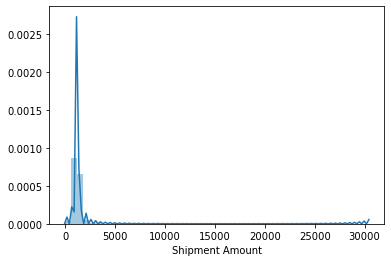

In [93]:
sns.distplot(df2['Shipment Amount'])
plt.show()

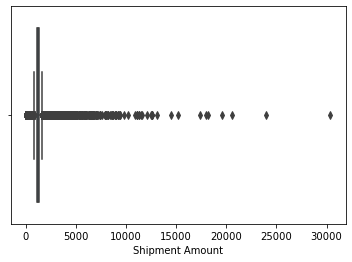

In [97]:
sns.boxplot(x='Shipment Amount', data=df2)
plt.show()

### There are a lot of outliers on the higher side in order amount

### Some of the outlier orders....

In [99]:
df2.loc[df2['Shipment Amount']>15000]

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time,Delivery Time
15318,NORTH,BB-KANPUR-ANCHOR STORE,KANPUR,28/02/21 8:50 pm,Standard Delivery,01/03/21 11:00 am-02:00 pm,Sanjeev Bajpai,9838072536,Confirmed,15168.80,Payu,BigBazaar Android,28,8:50,11:00 am-02:00 pm
23636,EAST,BB-ASANSOL-GALAXY MALL-BURNPUR ROAD,ASANSOL,26/02/21 4:47 pm,Standard Delivery,28/02/21 03:00 pm-07:00 pm,Binod Shaw,6294358084,Canceled,20540.95,Payu,PWA Android,26,4:47,03:00 pm-07:00 pm
30437,MUMBAI,BB-THANE-BHAYANDER-MAXUS MALL,MUMBAI,28/02/21 3:35 am,Standard Delivery,28/02/21 11:00 am-03:00 pm,Sejal Yadav,7021747698,Canceled,18214.30,FuturePay,PWA Android,28,3:35,11:00 am-03:00 pm
32166,WEST,BB-GANDIDHAM-ADITYA MALL CINEMA,GANDHIDHAM,27/02/21 10:39 pm,Standard Delivery,28/02/21 11:00 am-02:00 pm,Nilesh Varchand,9586046363,Canceled,17335.46,Payu,PWA Android,27,10:3,11:00 am-02:00 pm
43211,MUMBAI,BB-THANE-BHAYANDER-MAXUS MALL,MUMBAI,27/02/21 12:43 am,Standard Delivery,27/02/21 11:00 am-03:00 pm,Sejal Yadav,9987870618,Canceled,19609.55,Payu,PWA Android,27,12:4,11:00 am-03:00 pm
43319,WEST,BB-JODHPUR-OLD OLYMPIC CINEMA,JODHPUR,26/02/21 2:02 pm,Standard Delivery,27/02/21 11:00 am-02:00 pm,Daksh Jain,6375339344,Canceled,18015.00,Payu,PWA IOS,26,2:02,11:00 am-02:00 pm
45762,NCR,BB-NEW DELHI-KALKAJI METRO STATION,NCR,26/02/21 9:49 am,Standard Delivery,26/02/21 04:00 pm-08:00 pm,mohit kumar,8750148048,Canceled,23969.00,Payu,PWA Android,26,9:49,04:00 pm-08:00 pm
45775,NORTH,BB-RUDRAPUR-METROPOLIS MALL,RUDRAPUR,26/02/21 10:09 am,Standard Delivery,26/02/21 04:00 pm-08:00 pm,sanchay punyani,9927531359,Canceled,30371.70,Payu,PWA Android,26,10:0,04:00 pm-08:00 pm


### All these high value orders have been cancelled, except for one
### One Bhayander customer ordered twice, but cancelled both times (has a Future Pay wallet)

### How many orders were cancelled, refunded?

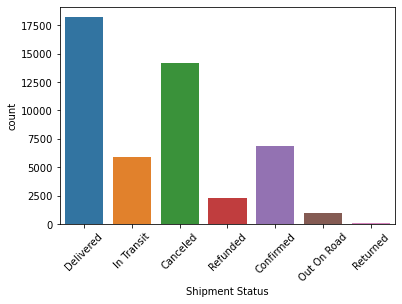

In [103]:
sns.countplot(x='Shipment Status', data=df2)
plt.xticks(rotation=45)
plt.show()

In [112]:
import re
df2.loc[df2['Shipment Status'].str.contains('Canceled|Refunded', regex=True)].count()

Zone                 16458
Store                16458
City                 16458
Order Date & Time    16458
Shipment Type        16458
Delivery Slot        16458
Customer Name        16458
Contact Number       16458
Shipment Status      16458
Shipment Amount      16458
Payment Mode         16458
Platform             16458
Date                 16458
Time                 16458
Delivery Time        16458
dtype: int64

In [115]:
df2.loc[df2['Shipment Status'].str.contains('Canceled|Refunded', regex=True)].sum()

Zone                 NCRNCRNCRNORTHNORTHNORTHNCRNCRNCRNCRNCRNCRNORT...
Store                BB-NEW DELHI-VASANT KUNJ-VASANT SQUARE MBB-NEW...
City                 NCRNCRNCRAGRAZIRAKPURCHANDIGARHNCRNCRNCRNCRNCR...
Order Date & Time    28/02/21 4:53 pm28/02/21 4:54 pm28/02/21 6:07 ...
Shipment Type        Standard DeliveryStandard DeliveryStandard Del...
Delivery Slot        03/03/21 05:00 pm-08:00 pm03/03/21 05:00 pm-08...
Customer Name        Rajender PalRajender PalPraveen SinghNeeraj Ag...
Contact Number                                         146000098372032
Shipment Status      CanceledCanceledRefundedRefundedCanceledCancel...
Shipment Amount                                            2.06403e+07
Payment Mode         PayuPayuFuturePayBBPCPayuPayuPayuPayuPayuPayuP...
Platform             BigBazaar AndroidBigBazaar AndroidPWA AndroidD...
Date                                                            449379
Time                 4:534:546:076:188:239:246:466:476:486:516:517:...
Delive

### We saw 16458 orders cancelled/ refunded, which amounted to 2 cr value

### What are the different payment modes?

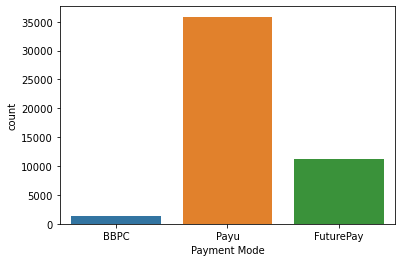

In [88]:
sns.countplot(x='Payment Mode', data=df2)
plt.show()

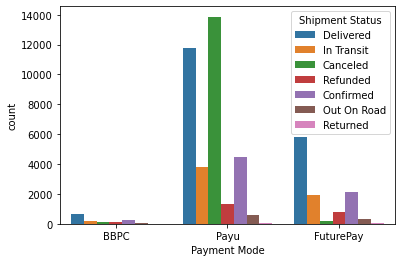

In [116]:
sns.countplot(x='Payment Mode', hue='Shipment Status', data=df2)
plt.show()

### Payu payment mode saw a large number of canceled orders

### Which stores have got higher orders of in-store pick-up?

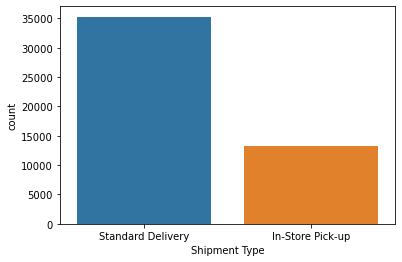

In [142]:
sns.countplot(x='Shipment Type', data=df2)
plt.show()

In [146]:
df2['Shipment Type'].value_counts()

Standard Delivery    35291
In-Store Pick-up     13203
Name: Shipment Type, dtype: int64

In [153]:
(df2['Shipment Type'].value_counts())/(len(df2['Shipment Type']))*100

Standard Delivery    72.773951
In-Store Pick-up     27.226049
Name: Shipment Type, dtype: float64

### 27% of orders were through In-Store Pick-up

### Which date and time got peak orders?

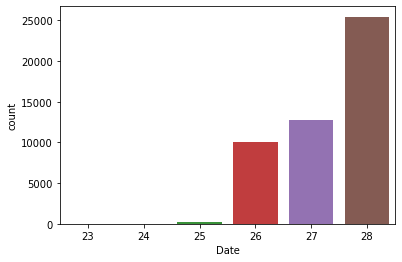

In [158]:
sns.countplot(x='Date', data=df2)
plt.show()

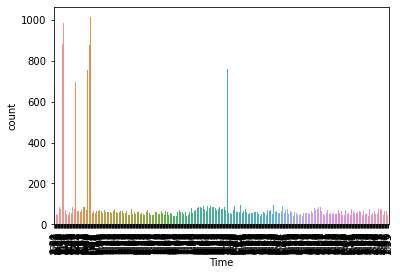

In [165]:
sns.countplot(x='Time', data=df2)
plt.xticks(rotation=90)
plt.show()

In [169]:
df2.groupby(df2['Time']).count().sort_values(by='Shipment Type', ascending=False)

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Delivery Time
Time,,,,,,,,,,,,,,
11:2,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
11:1,995,995,995,995,995,995,995,995,995,995,995,995,995,995
11:3,986,986,986,986,986,986,986,986,986,986,986,986,986,986
11:4,943,943,943,943,943,943,943,943,943,943,943,943,943,943
10:5,936,936,936,936,936,936,936,936,936,936,936,936,936,936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7:35,39,39,39,39,39,39,39,39,39,39,39,39,39,39
6:40,39,39,39,39,39,39,39,39,39,39,39,39,39,39
3:25,39,39,39,39,39,39,39,39,39,39,39,39,39,39


In [170]:
df2.groupby(df2['Time']).count().sort_values(by='Shipment Type', ascending=True)

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Customer Name,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Delivery Time
Time,,,,,,,,,,,,,,
6:29,33,33,33,33,33,33,33,33,33,33,33,33,33,33
6:02,38,38,38,38,38,38,38,38,38,38,38,38,38,38
6:40,39,39,39,39,39,39,39,39,39,39,39,39,39,39
3:25,39,39,39,39,39,39,39,39,39,39,39,39,39,39
7:35,39,39,39,39,39,39,39,39,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10:5,936,936,936,936,936,936,936,936,936,936,936,936,936,936
11:4,943,943,943,943,943,943,943,943,943,943,943,943,943,943
11:3,986,986,986,986,986,986,986,986,986,986,986,986,986,986


### 11 am period saw the highest number of orders
### 6 am period saw the least number of orders

### What are the preferred delivery slots?

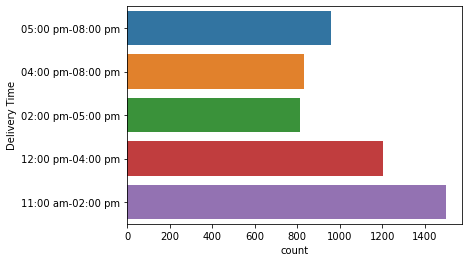

In [173]:
ncr=df2.loc[df2['City'].str.contains('NCR', regex=True)]
sns.countplot(y='Delivery Time', data=ncr)
plt.show()

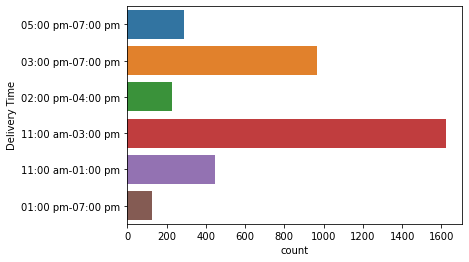

In [174]:
mumbai=df2.loc[df2['City'].str.contains('MUMBAI', regex=True)]
sns.countplot(y='Delivery Time', data=mumbai)
plt.show()

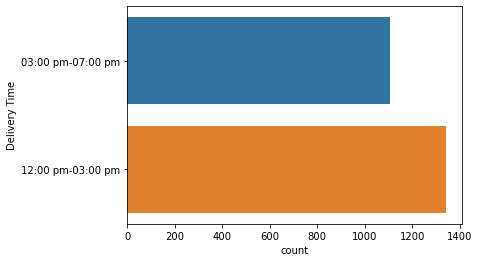

In [175]:
kolkata=df2.loc[df2['City'].str.contains('KOLKATA', regex=True)]
sns.countplot(y='Delivery Time', data=kolkata)
plt.show()

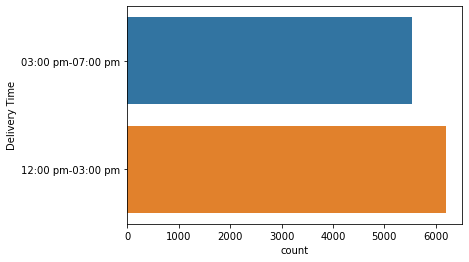

In [183]:
east=df2.loc[df2['Zone'].str.contains('EAST', regex=True)]
sns.countplot(y='Delivery Time', data=east)
plt.show()

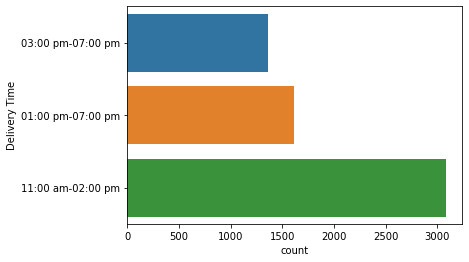

In [185]:
west=df2.loc[df2['Zone'].str.contains('WEST', regex=True)]
sns.countplot(y='Delivery Time', data=west)
plt.show()

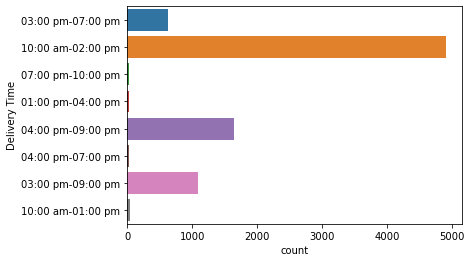

In [187]:
south=df2.loc[df2['Zone'].str.contains('SOUTH', regex=True)]
sns.countplot(y='Delivery Time', data=south)
plt.show()

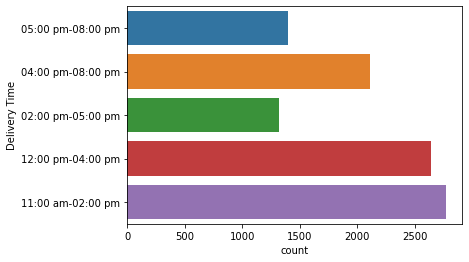

In [188]:
north=df2.loc[df2['Zone'].str.contains('NORTH', regex=True)]
sns.countplot(y='Delivery Time', data=north)
plt.show()

### Preferred delivery times
- NCR: noon and afternoon hours
- Mumbai: noon and afternoon hours, also evening hours
- Kolkata: similar preference for morning and evening slots
### East shows a similar preference for morning and evening slots
### South shows a distinct preference for morning slots
### West and North also prefer morning slots

### Do customers ordering from their i-phones order for a larger amount?

In [190]:
df2.groupby(df2['Platform'])['Shipment Amount'].mean()

Platform
BigBazaar Android    1215.372847
Desktop              1296.817612
IOS App              1275.957434
PWA Android          1240.118071
PWA IOS              1329.948166
Name: Shipment Amount, dtype: float64

### i-phone customers have indeed ordered for a higher amount

In [192]:
df2.groupby(df2['Payment Mode'])['Shipment Amount'].mean()

Payment Mode
BBPC         1465.768253
FuturePay    1202.532513
Payu         1241.759813
Name: Shipment Amount, dtype: float64

### BBPC members have ordered for a higher amount

### Any customer placing multiple orders

In [196]:
df2.groupby(df2['Customer Name']).count().sort_values(by='Shipment Amount', ascending=False)

,Zone,Store,City,Order Date & Time,Shipment Type,Delivery Slot,Contact Number,Shipment Status,Shipment Amount,Payment Mode,Platform,Date,Time,Delivery Time
Customer Name,,,,,,,,,,,,,,
Tarveen Kaur,69,69,69,69,69,69,69,69,69,69,69,69,69,69
DINESH Tahilyani,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Manoj Kumar,59,59,59,59,59,59,59,59,59,59,59,59,59,59
Anil Kumar,50,50,50,50,50,50,50,50,50,50,50,50,50,50
Sanjay Kumar,47,47,47,47,47,47,47,47,47,47,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Md Suleman,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Md Sirajul,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Md Shayan Hashir,1,1,1,1,1,1,1,1,1,1,1,1,1,1


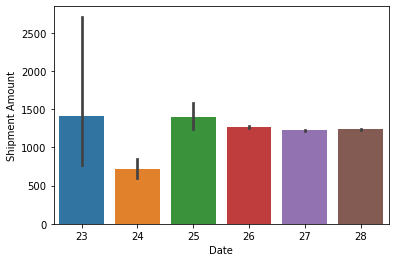

In [200]:
sns.barplot(x='Date', y='Shipment Amount', data=df2)
plt.show()

### Shipment amount was similar across all the three days
- it dropped on 24th Feb, when there was a free delivery offer